#Parkinsons Disease Classification

---



# Business Problem:

Classifying Patients for Parkinsons Disease based on 23 different features

In [1]:
#pip install streamlit

##Import Libraries

In [2]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from pathlib import Path
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
#st.title('Parkinsons Disease Classification')

###Import CSV file from Repository

In [4]:
my_file = Path("Parkinsson disease.csv")
if my_file.is_file()==False:
  !wget 'https://github.com/Bahaakhalled/Parkinsons-Disease-Classification/raw/main/Parkinsson%20disease.csv'

--2022-12-04 05:45:11--  https://github.com/Bahaakhalled/Parkinsons-Disease-Classification/raw/main/Parkinsson%20disease.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Bahaakhalled/Parkinsons-Disease-Classification/main/Parkinsson%20disease.csv [following]
--2022-12-04 05:45:11--  https://raw.githubusercontent.com/Bahaakhalled/Parkinsons-Disease-Classification/main/Parkinsson%20disease.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38273 (37K) [text/plain]
Saving to: ‘Parkinsson disease.csv’

Parkinsson disease. 100%[===================>]  37.38K  --.-KB/s    in 0.001s  

2022-12-04 05

In [5]:
park=pd.read_csv('Parkinsson disease.csv')
park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


###Getting to know the Data

In [6]:
park.shape

(195, 24)

In [7]:
park.isnull().sum().sum()

0

In [8]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
park.name.nunique()

195

In [10]:
park.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
park.duplicated().sum()

0

In [12]:
X=park
y=park['status']
X=X.drop(columns=["status",'name'])
print(X.shape,y.shape)

(195, 22) (195,)


###Check for imbalanced data

<AxesSubplot:xlabel='status', ylabel='count'>

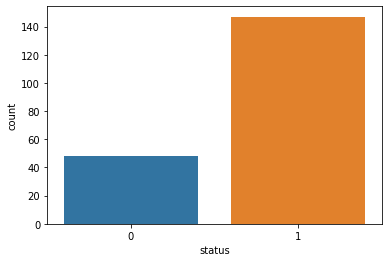

In [13]:
sns.countplot(x="status", data=park)

In [14]:
park.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [15]:
print(str((147/(147+48))*100) + '% of the data have Parkinsons Disease with a ratio of 49:16')

75.38461538461539% of the data have Parkinsons Disease with a ratio of 49:16


##Feature Sampling

####Tomek Links

In [16]:
ran_under=TomekLinks(sampling_strategy='not minority')
X_under, y_under= ran_under.fit_resample(X, y)
print(Counter(y_under))

Counter({1: 141, 0: 48})


####Random Over and Undersampling

In [17]:
ran_over = RandomOverSampler(sampling_strategy='minority',random_state=1)
X_over, y_over = ran_over.fit_resample(X, y)
print(Counter(y_over))

Counter({1: 147, 0: 147})


In [18]:
ran_under = RandomUnderSampler(sampling_strategy='majority',random_state=1)
X_under, y_under= ran_under.fit_resample(X, y)
print(Counter(y_under))

Counter({0: 48, 1: 48})


In [19]:
park_over=X_over.copy()
park_over['status']=y_over
park_under=X_under.copy()
park_under['status']=y_under

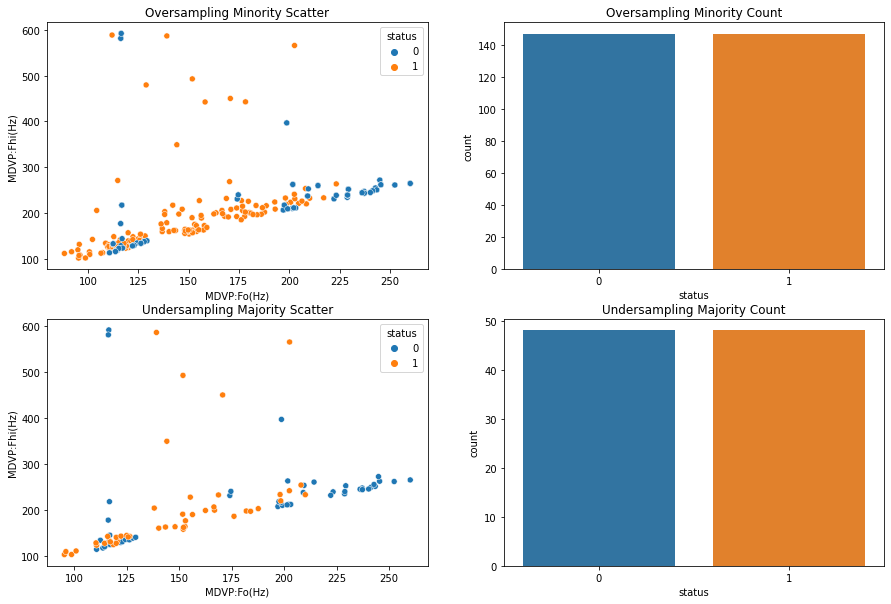

In [20]:
figure, axis = plt.subplots(2, 2,figsize=(15,10))

sns.scatterplot(ax=axis[0,0],data=park_over,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status')
axis[0, 0].set_title("Oversampling Minority Scatter")
  
sns.countplot(ax=axis[0, 1],x="status", data=park_over)
axis[0, 1].set_title("Oversampling Minority Count")
  
sns.scatterplot(ax=axis[1, 0],data=park_under,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status')
axis[1, 0].set_title("Undersampling Majority Scatter")
  
sns.countplot(ax=axis[1, 1],x="status", data=park_under)
axis[1, 1].set_title("Undersampling Majority Count")
plt.show()

In [21]:
park_over.duplicated().sum()

99

####Synthetic Minority Oversampling Technique(SMOTE): Another Oversampling Technique

In [22]:
sm = SMOTE(sampling_strategy='minority', random_state=1)
X_smote, y_smote= sm.fit_resample(X, y)
print(Counter(y_smote))

Counter({1: 147, 0: 147})


In [23]:
X_smote.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [24]:
park_smote=X_smote.copy()
park_smote['status']=y_smote

[Text(0.5, 1.0, 'SMOTE Count')]

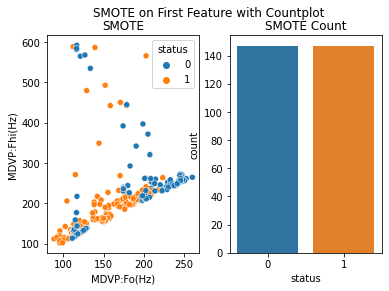

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('SMOTE on First Feature with Countplot')
sns.scatterplot(ax=ax1,data=park_smote,x='MDVP:Fo(Hz)',y='MDVP:Fhi(Hz)',hue='status').set(title='SMOTE')
sns.countplot(ax=ax2,x="status", data=park_smote).set(title='SMOTE Count')

After results try mixing between smote and tomek links or ENN to provide better accuracy

##Feature Scaling

In [26]:
cols=X_smote.columns

Normalization

In [27]:
norm_smote=pd.DataFrame(preprocessing.normalize(X_smote),columns=cols)
norm_over=pd.DataFrame(preprocessing.normalize(X_over),columns=cols)
norm_under=pd.DataFrame(preprocessing.normalize(X_under),columns=cols)

Scaling

In [28]:
scale_under=pd.DataFrame(preprocessing.scale(X_under),columns=cols)
scale_over=pd.DataFrame(preprocessing.scale(X_over),columns=cols)
scale_smote=pd.DataFrame(preprocessing.scale(X_smote),columns=cols)

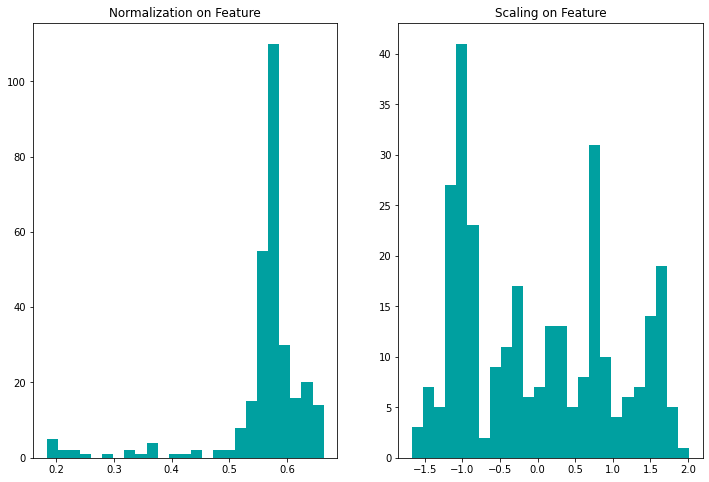

In [29]:
fig, axs = plt.subplots(1,2,figsize=(12,8))
axs[0].hist(norm_smote['MDVP:Fo(Hz)'], bins = 25, color = '#00A0A0')
axs[0].title.set_text('Normalization on Feature')
axs[1].hist(scale_smote['MDVP:Fo(Hz)'], bins = 25, color = '#00A0A0')
axs[1].title.set_text('Scaling on Feature')

Feature Skewness after first model

##Model Prediction

Predict using all different data created using three different classifiers

In [30]:
def predictmodels(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  clf_A = RandomForestClassifier(random_state=3)
  clf_B = DecisionTreeClassifier(random_state=3)
  clf_C = AdaBoostClassifier(random_state=3)

  results = {}
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      results = {}
      start = time()
      clf = clf.fit(X_train, y_train)
      end = time()
      results['train_time'] = end-start
        
      start = time()
      predictions_test = clf.predict(X_test)
      end = time()
      print(clf)
      print('prediction_time: ' + str(end-start))
      #print('Accuracy Score: ' + str(accuracy_score(y_test,predictions_test)))
      print('fb Score: '+ str(fbeta_score(y_test,predictions_test,beta=0.5)))
      print()
  return X_train, X_test, y_train, y_test

Using Best classifer used in the function above to further tune it to increase Accuracy

In [31]:
def Gridsrch(clf,n):
  if n==1:
    parameters={'n_estimators':[80,120,150],'min_samples_leaf':[1,2,3]}
  else:
    parameters={'n_estimators':[200,300,400],'learning_rate':[1.0,1.2,1.8]}

  scorer=make_scorer(fbeta_score,beta=0.1)

  grid_layout=GridSearchCV(clf,parameters,scoring=scorer)

  grid_fit=grid_layout.fit(X_train,y_train)

  best_clf=grid_fit.best_estimator_

  #predict using plane and optimized model
  predictions=(clf.fit(X_train,y_train).predict(X_test))
  best_predictions=best_clf.predict(X_test)
  print(str(clf) +" before Optimization: " + str(fbeta_score(y_test,predictions,beta=0.5)))
  print(str(clf) +" after Optimization: " + str(fbeta_score(y_test,best_predictions,beta=0.5)))
  print(grid_fit.best_params_)
  return grid_fit

In [32]:
X_train, X_test, y_train, y_test=predictmodels(scale_smote,y_smote)

Training set has 235 samples.
Testing set has 59 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.012699127197265625
fb Score: 0.9541984732824427

DecisionTreeClassifier(random_state=3)
prediction_time: 0.0015721321105957031
fb Score: 0.8888888888888888

AdaBoostClassifier(random_state=3)
prediction_time: 0.008454084396362305
fb Score: 0.934959349593496



In [33]:
Gridsrch(RandomForestClassifier(random_state=3),1)

RandomForestClassifier(random_state=3) before Optimization: 0.9541984732824427
RandomForestClassifier(random_state=3) after Optimization: 0.9541984732824427
{'min_samples_leaf': 1, 'n_estimators': 80}


GridSearchCV(estimator=RandomForestClassifier(random_state=3),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [80, 120, 150]},
             scoring=make_scorer(fbeta_score, beta=0.1))

fbeta score using Scale Smote: 0.9541984732824427

In [34]:
X_train, X_test, y_train, y_test=predictmodels(scale_over,y_over)

Training set has 235 samples.
Testing set has 59 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.013272285461425781
fb Score: 0.9842519685039369

DecisionTreeClassifier(random_state=3)
prediction_time: 0.0018191337585449219
fb Score: 0.9663865546218487

AdaBoostClassifier(random_state=3)
prediction_time: 0.008795499801635742
fb Score: 0.9842519685039369



In [35]:
Gridsrch(RandomForestClassifier(random_state=3),1)

RandomForestClassifier(random_state=3) before Optimization: 0.9842519685039369
RandomForestClassifier(random_state=3) after Optimization: 0.9842519685039369
{'min_samples_leaf': 2, 'n_estimators': 120}


GridSearchCV(estimator=RandomForestClassifier(random_state=3),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [80, 120, 150]},
             scoring=make_scorer(fbeta_score, beta=0.1))

fbeta score using Scale Oversampling : 0.9842519685039369

In [36]:
X_train, X_test, y_train, y_test=predictmodels(scale_under,y_under)

Training set has 76 samples.
Testing set has 20 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.012136459350585938
fb Score: 0.9523809523809523

DecisionTreeClassifier(random_state=3)
prediction_time: 0.001392364501953125
fb Score: 0.9259259259259258

AdaBoostClassifier(random_state=3)
prediction_time: 0.009038448333740234
fb Score: 0.9259259259259258



In [37]:
Gridsrch(RandomForestClassifier(random_state=3),1)

RandomForestClassifier(random_state=3) before Optimization: 0.9523809523809523
RandomForestClassifier(random_state=3) after Optimization: 0.9523809523809523
{'min_samples_leaf': 3, 'n_estimators': 150}


GridSearchCV(estimator=RandomForestClassifier(random_state=3),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [80, 120, 150]},
             scoring=make_scorer(fbeta_score, beta=0.1))

highest fbeta Score using Scale Undersampling: 0.9782608695652175

In [38]:
results = pd.DataFrame()
results['Model']=['SMOTE','Oversampling','Undersampling']
results['fb-Score']=[0.9541984732824427,0.9842519685039369,0.9782608695652175]
results.sort_values(by='fb-Score',ascending=False)

,Model,fb-Score
1,Oversampling,0.984252
2,Undersampling,0.978261
0,SMOTE,0.954198


In [39]:
X_train, X_test, y_train, y_test=predictmodels(X_over,y_over)

Training set has 235 samples.
Testing set has 59 samples.

RandomForestClassifier(random_state=3)
prediction_time: 0.012654781341552734
fb Score: 0.9842519685039369

DecisionTreeClassifier(random_state=3)
prediction_time: 0.0015108585357666016
fb Score: 0.9663865546218487

AdaBoostClassifier(random_state=3)
prediction_time: 0.008324623107910156
fb Score: 0.9842519685039369



Using ADA boost Classifier on non-scaled or normalized over sampled data

In [40]:
best=Gridsrch(AdaBoostClassifier(random_state=3),2)

AdaBoostClassifier(random_state=3) before Optimization: 0.9842519685039369
AdaBoostClassifier(random_state=3) after Optimization: 0.9923664122137406
{'learning_rate': 1.2, 'n_estimators': 200}


Highest FB score using ADA boost classifier on Over Sampled Data:0.9923664122137406

In [41]:
estimator=best.best_estimator_

In [42]:
preds=estimator.predict(X_test)

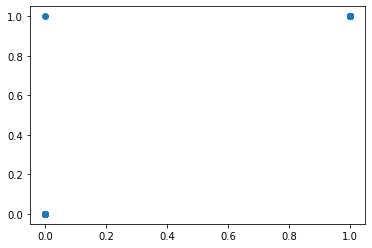

In [43]:
plt.scatter(x=preds,y=y_test)

In [44]:
df_pf = pd.DataFrame(preds, columns=['Predictions'])
df_pf['Targets'] = y_test.reset_index(drop=True)
df_pf.loc[df_pf['Predictions']!=df_pf['Targets']]

,Predictions,Targets
30,0,1


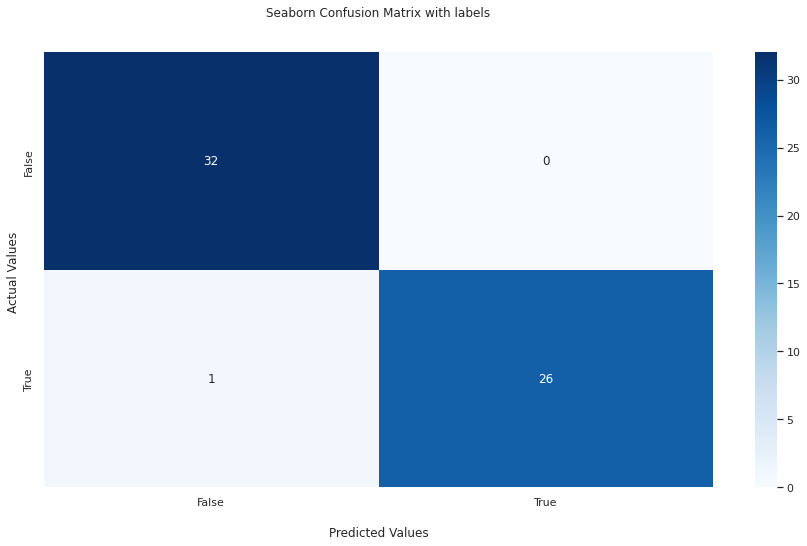

In [45]:
cm=confusion_matrix(y_test,preds)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()